In [1]:
import keras 
import tensorflow as tf 
from tensorflow.keras.applications import Xception # Import Xception

In [2]:
# Preprocessing function for Xception
preprocess_input = tf.keras.applications.xception.preprocess_input

In [3]:
model_save_path = 'my_xception_model.keras'
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully!")
loaded_model.summary()

Model loaded successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,873,776 (79.63 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 8,198 (32.03 KB)

(np.float64(-0.5), np.float64(2239.5), np.float64(1259.5), np.float64(-0.5))

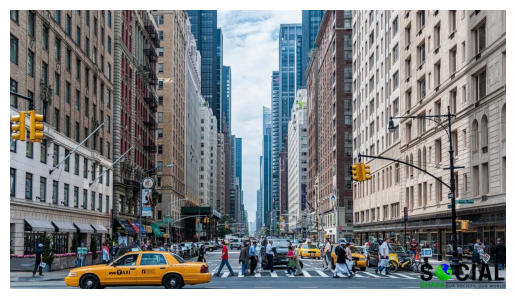

In [4]:
from pathlib import Path 
from PIL import Image
import matplotlib.pyplot as plt
image_path = Path("urban-1.jpg")
img = Image.open(image_path)
plt.imshow(img)
plt.axis(False)

In [8]:
from keras.preprocessing import image 
import numpy as np
img = image.load_img(image_path,target_size=(224,224,3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr,axis=0)## for batch 
img_arr.shape
img_proc =preprocess_input(img_arr)

In [18]:
y_pred = loaded_model.predict(img_proc)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.00338426, 0.9966157 ]], dtype=float32)

In [19]:
y_pred = np.argmax(y_pred,axis=1).item()
class_names= ['rural', 'urban']
print(f"The Predioction is : {class_names[y_pred]}")

The Predioction is : urban


In [20]:
y_pred

1

In [29]:
def load_and_preprocessing_image(image_path): 
    img = image.load_img(image_path,target_size=(224,224,3))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr,axis=0)## add batch size dimension
    # img_arr.shape
    img_proc =preprocess_input(img_arr)
    return img,img_proc 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


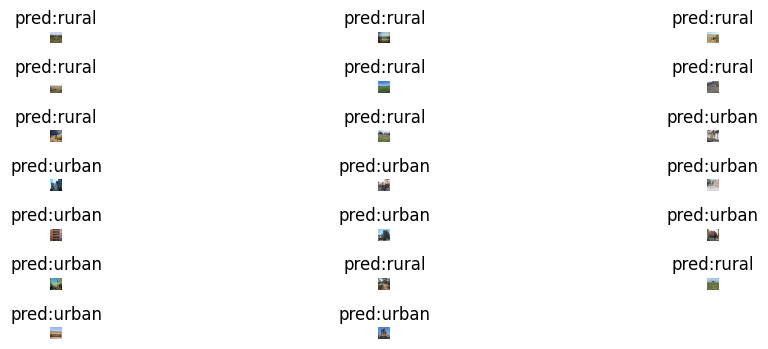

In [30]:
images_dir = Path("./rural_and_urban_photos/val")

files_path = [ f for f in images_dir.glob("*/*.jpeg")]+ [ f for f in images_dir.glob("*/*.jpg")]
plt.figure(figsize=(10,10))
n = len(files_path)
for i,path in enumerate(files_path): 
    img,img_proc = load_and_preprocessing_image(path)
    y_pred = loaded_model.predict(img_proc)
    y_prod = np.argmax(y_pred).item()
    plt.subplot(n,3,i+1)
    plt.imshow(img)
    plt.title(f"pred:{class_names[y_prod]}")
    plt.axis(False)
plt.tight_layout()
plt.show()


Plotting 9 random images from validation set...


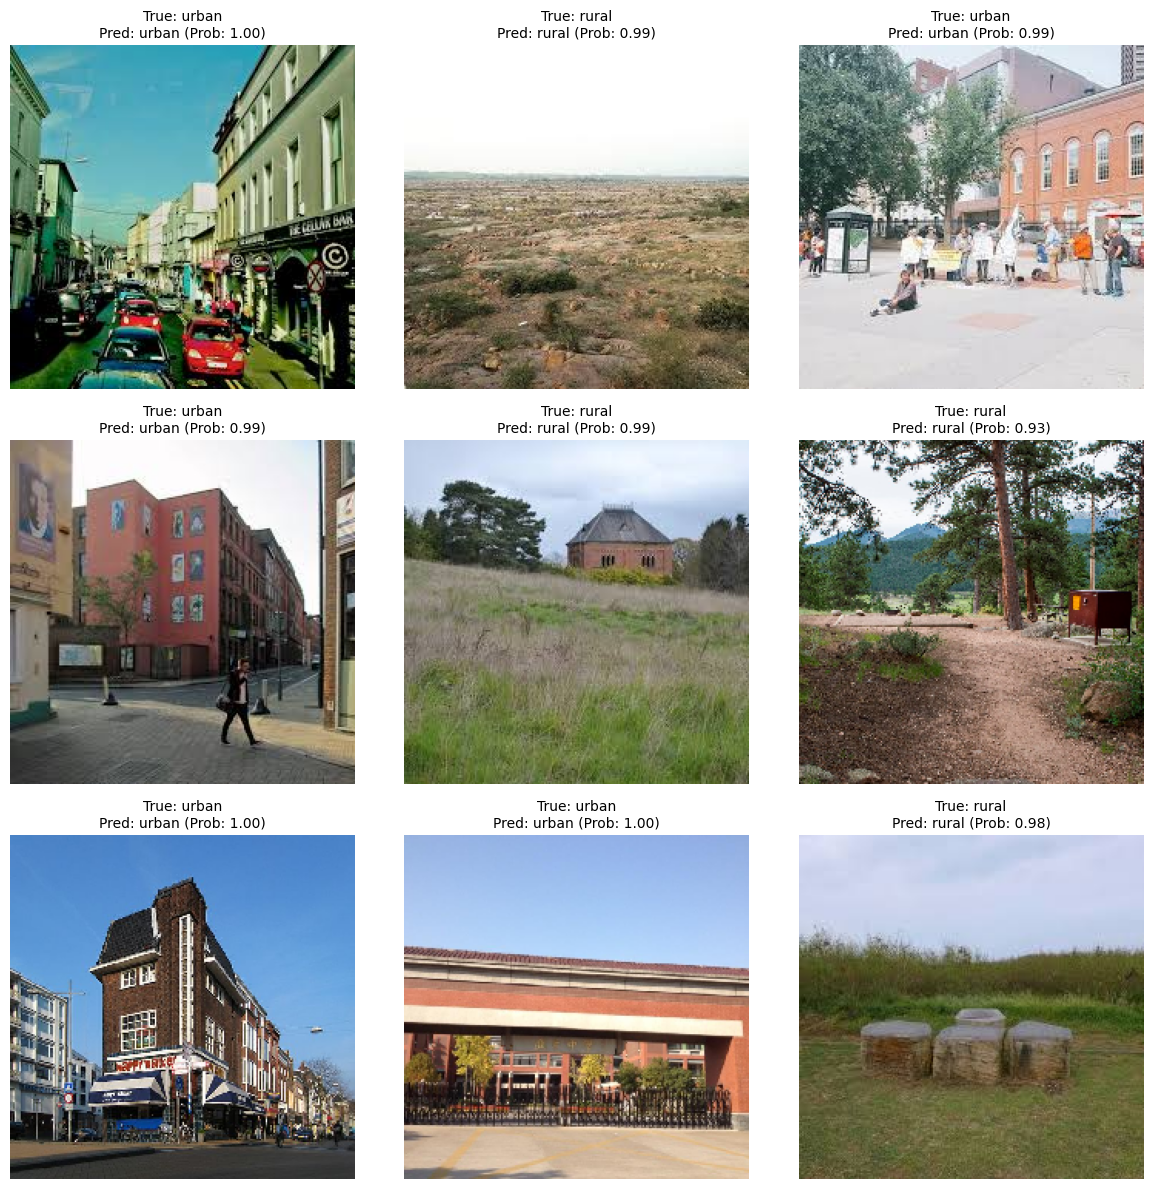


Finished plotting images and predictions.


In [32]:
import random # For shuffling and sampling
# --- Determine number of images to display and sample them ---
num_images_to_display = min(9, len(files_path)) # Display up to 9 images
if num_images_to_display == 0:
    print(f"No image files found in {images_dir}.")
else:
    # Randomly select images to display
    selected_files = random.sample(files_path, num_images_to_display)

    # Calculate grid dimensions: aiming for roughly square plots
    rows = int(np.ceil(num_images_to_display / 3)) # Max 3 columns
    cols = min(num_images_to_display, 3) if rows == 1 else 3

    plt.figure(figsize=(cols * 4, rows * 4)) # Adjust figure size dynamically

    print(f"Plotting {num_images_to_display} random images from validation set...")
    for i, path in enumerate(selected_files):
        try:
            img, img_proc = load_and_preprocessing_image(path)
            y_pred_probs = loaded_model.predict(img_proc, verbose=0) # verbose=0 to suppress prediction progress bar
            y_pred_class_idx = np.argmax(y_pred_probs).item() # .item() converts numpy scalar to Python int

            # Get the true label if possible (requires parsing path)
            true_label_name = path.parent.name # Assumes parent folder is the class name
            try:
                # Find the index of the true label for comparison if needed
                true_label_idx = class_names.index(true_label_name)
                title_text = f"True: {true_label_name}\nPred: {class_names[y_pred_class_idx]} (Prob: {y_pred_probs[0][y_pred_class_idx]:.2f})"
            except ValueError:
                title_text = f"Pred: {class_names[y_pred_class_idx]} (Prob: {y_pred_probs[0][y_pred_class_idx]:.2f})"

            plt.subplot(rows, cols, i + 1)
            plt.imshow(img) # Display the original image
            plt.title(title_text, fontsize=10)
            plt.axis(False) # Turn off axis ticks and labels

        except Exception as e:
            print(f"Error processing image {path}: {e}")
            # Optionally, you can plot an empty subplot or an error message here
            plt.subplot(rows, cols, i + 1)
            plt.text(0.5, 0.5, 'Error', ha='center', va='center', fontsize=12, color='red')
            plt.axis(False)

    plt.tight_layout() # Adjust layout to prevent overlaps
    plt.show()

print("\nFinished plotting images and predictions.")